In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv('./simple_vegetable_sales_data.csv')

# Exploratory Data Analysis
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          360 non-null    int64  
 1   Sales(kg)      360 non-null    float64
 2   Supplier_Name  360 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 8.6+ KB


,Month,Sales(kg),Supplier_Name
0,1,3675.25,Walmart
1,2,4588.39,Walmart
2,3,5079.92,Walmart
3,4,5541.03,Walmart
4,5,6134.35,Walmart


In [22]:
#null values
df.isnull().sum()

Month            0
Sales(kg)        0
Supplier_Name    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [24]:
# convert to lower case (encoding)
df["Supplier_Name"] = df["Supplier_Name"].str.lower()

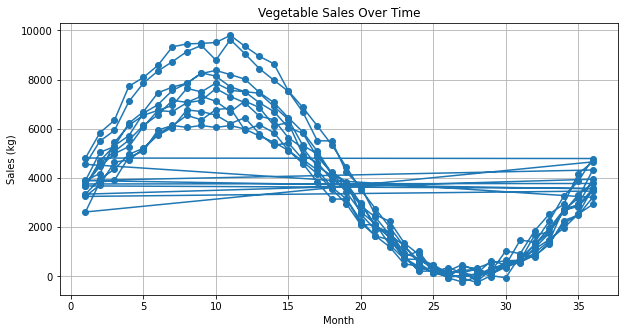

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df["Month"], df["Sales(kg)"], marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Sales (kg)")
plt.title("Vegetable Sales Over Time")
plt.grid(True)
plt.show()

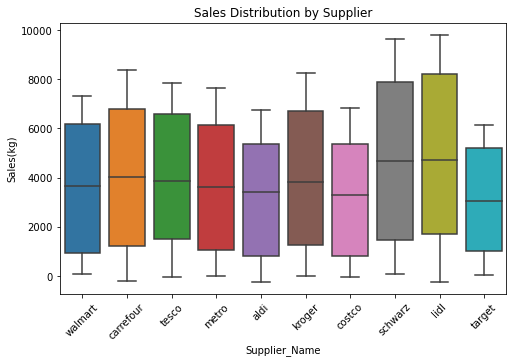

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Supplier_Name", y="Sales(kg)", data=df)
plt.xticks(rotation=45)
plt.title("Sales Distribution by Supplier")
plt.show()

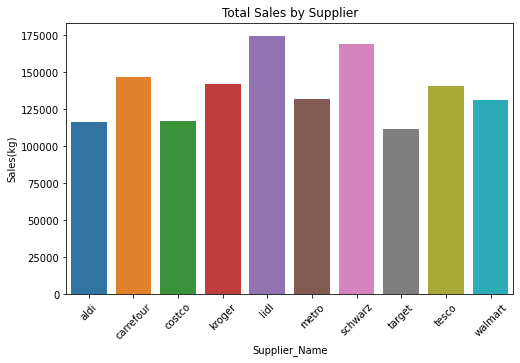

In [28]:
supplier_sales = df.groupby("Supplier_Name")["Sales(kg)"].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x="Supplier_Name", y="Sales(kg)", data=supplier_sales)
plt.xticks(rotation=45)
plt.title("Total Sales by Supplier")
plt.show()

In [ ]:
scaler = MinMaxScaler()
df["Sales(kg)_scaled"] = scaler.fit_transform(df[["Sales(kg)"]])

In [30]:
df.describe()

,Month,Sales(kg),Sales(kg)_scaled
count,360.000000,360.000000,360.000000
mean,18.500000,3839.655694,0.406736
std,10.402753,2779.241967,0.276721
min,1.000000,-245.390000,0.000000
25%,9.750000,1140.667500,0.138006
50%,18.500000,3793.370000,0.402127
75%,27.250000,6135.475000,0.635323
max,36.000000,9798.100000,1.000000


In [ ]:
scaler = StandardScaler()
df["Sales(kg)_standardized"] = scaler.fit_transform(df[["Sales(kg)"]])

In [32]:
df.describe()

,Month,Sales(kg),Sales(kg)_scaled,Sales(kg)_standardized
count,360.000000,360.000000,360.000000,3.600000e+02
mean,18.500000,3839.655694,0.406736,2.602856e-16
std,10.402753,2779.241967,0.276721,1.001392e+00
min,1.000000,-245.390000,0.000000,-1.471887e+00
25%,9.750000,1140.667500,0.138006,-9.724755e-01
50%,18.500000,3793.370000,0.402127,-1.667725e-02
75%,27.250000,6135.475000,0.635323,8.272092e-01
max,36.000000,9798.100000,1.000000,2.146894e+00


In [ ]:
# Define features (X) and target (y)
X = df.drop('Sales(kg)', axis=1)
y = df['Sales(kg)']
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [ ]:
# One-hot encode the categorical column
categorical_features = ['Supplier_Name']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)

# Transform the features
X = preprocessor.fit_transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 360.3421048912727
R^2 Score: 0.9999439402903922


In [ ]:
import joblib

# Save the model
joblib.dump(rf_model, "regression_model.pkl")